In [17]:
import os
import pathlib
import seaborn as sns
# sns.__version__   '0.10.1'
import tensorflow as tf
import numpy as np
import pickle
import tqdm
import glob
import pandas as pd
import math
import matplotlib.pyplot as plt

#0 special character definition
bs='\\'
slash='/'
dot='.'
nextline = '\n'

tf.__version__

'1.14.0'

In [4]:
#0 directory of data
data_dir=r'/home/bssuh/jwhan/npy_data_test'    #/home/bssuh/jwhan/npy_data_test

# 1.hyper parameters setting
learning_rate = 0.0001
training_epochs = 10
batch_size = 10

tf.compat.v1.random.set_random_seed(957)

# 1.create checkpoint directory
currentdir = os.getcwd()
checkpt_dir_name = 'checkpoints'
modelname = 'dist_cnn_CD_OH_20221117_modelsave'
modeltopdir = r'/home/bssuh/repo_bssuh_seism/program/model'
resultmodeldir = os.path.join(modeltopdir, modelname)    #/home/bssuh/repo_bssuh_seism/program/model/dist_cnn_seq
checkpointdir = os.path.join(resultmodeldir, checkpt_dir_name)    #/home/bssuh/repo_bssuh_seism/program/model/dist_cnn_seq/checkpoints


In [5]:
# 2.load data        #INPUT=Width*Height*channel
def load_data(npy):    
    st=np.load(npy)
    a=st.reshape(6000,3)    # 6000*3
    b=np.expand_dims(a,axis=0)    # ??*6000*3
    c=np.expand_dims(b,axis=0)    # ??*??*6000*3(ZNE)    batch*height*width*channel
    return c

# pickle module(파이썬 객체 자체를 파일로 저장. 불러오기만 하면 되므로 속도 빨라짐)
## Save pickle
""" with open(r'/home/bssuh/repo_bssuh_seism/program/eqdata.pkl','wb') as fh1:    #pickle file directory
    pickle.dump(dataload,fh1) #여기 아래에 quit()으로 일단 pkl 파일 작성
quit() """
## Load pickle
with open(r'/home/bssuh/repo_bssuh_seism/program/eqdata.pkl','rb') as fh1:    #pickle file directory
    dataload=pickle.load(fh1)


In [6]:
# 2.datasets
npylist = sorted(glob.glob(data_dir+'/*.npy'))    #/home/bssuh/jwhan/npy_data_test/2020364_212732.KS.YOCB.HH_42.18_.npy
labellist = []
for i in tqdm.tqdm(npylist):
    fname = i.split(slash)[-1]    #npy_data_test/2020364_212732.KS.YOCB.HH_42.18_.npy
    labelfloat = float(fname.split('_')[2])    # 42.18(float)
    labelround = float(round(labelfloat))    #42(float)
    labellist.append(labelround)
print(f"Total data number is {len(labellist)}")    # Total data number is 101437


100%|██████████| 101437/101437 [00:00<00:00, 828896.43it/s]

Total data number is 101437


In [7]:
labels = np.array(labellist)
npys = np.vstack(dataload)

labels

array([37., 37., 60., ...,  2., 42., 42.])

- Distribution plot
    1. Histogram : 질량분포(이산적)

<AxesSubplot:>

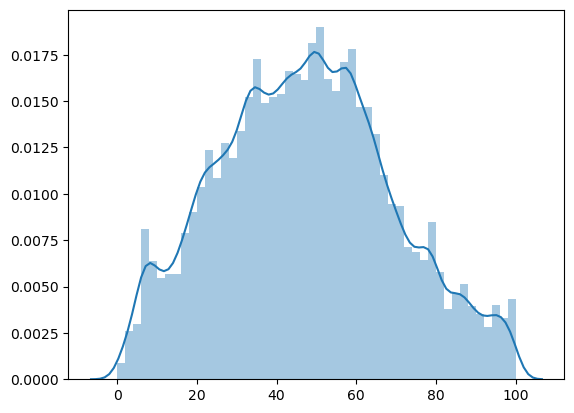

In [11]:
# Histogram
sns.distplot(labels,hist=True)


   2. KDE plot: 밀도 분포(연속적)

<AxesSubplot:>

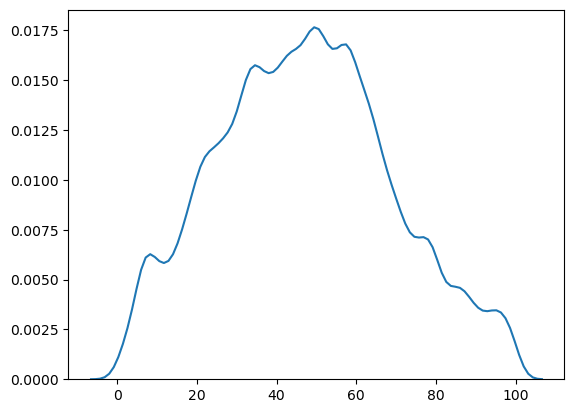

In [12]:
sns.kdeplot(labels)

    3. Rug plot : 개별 관측치의 위치 표시(주로 KDE plot과 같이 사용)

<AxesSubplot:>

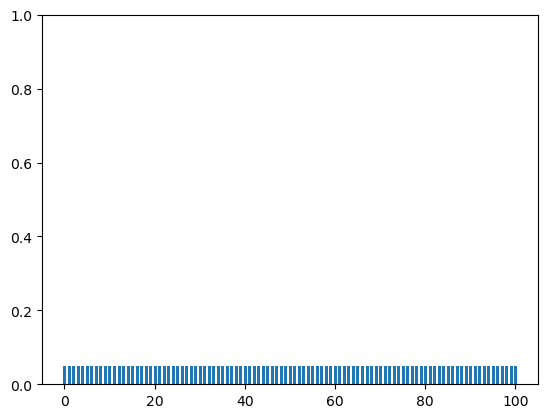

In [13]:
sns.rugplot(labels)

<AxesSubplot:>

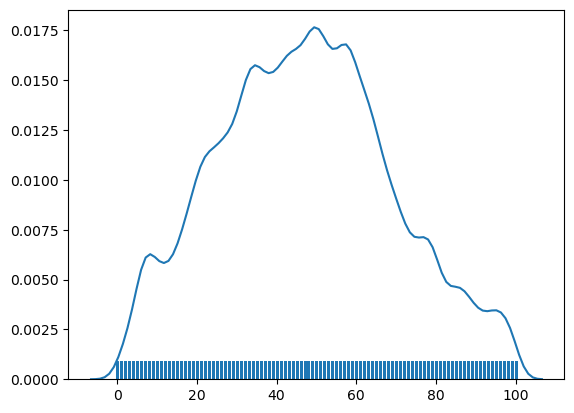

In [14]:
sns.kdeplot(labels)
sns.rugplot(labels)

- Categorical plot  
    5. bar plot
